# Dados de Seguro Rural

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

## Funções

In [2]:
# função para deixar todos os nomes de municípios iguais (sem acento, sem espaço)
def simplificar_nomes(df, variavel):
  df[variavel] = (df[variavel].str.strip()
                 .str.lower()
                 .str.replace(' ', '_')
                 .str.replace('\'', '')
                 .str.replace('-','_')
                 .str.replace('á', 'a')
                 .str.replace('é', 'e')
                 .str.replace('í', 'i')
                 .str.replace('ó', 'o')
                 .str.replace('ú', 'u')
                 .str.replace('â', 'a')
                 .str.replace('ê', 'e')
                 .str.replace('ô', 'o')
                 .str.replace('í', 'i')
                 .str.replace('ã','a')
                 .str.replace('õ','o')
                 .str.replace('ç','c')
                 .str.replace('à', 'a')
                 .str.replace('ü', 'u'))

## Dados

In [106]:
cod = pd.read_csv('/home/walef/Dropbox/Mestrado/Dados/codigos-mun.csv')

In [107]:
cod.head()

,cod_uf,nome_uf,mun,nome_mun,rm,meso,nome_meso,micro,nome_micro,codmun6,regiao,nome_regiao
0,11,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,Leste Rondoniense,11006,Cacoal,110001,1,Norte
1,11,Rondônia,1100023,Ariquemes,NaN,1102,Leste Rondoniense,11003,Ariquemes,110002,1,Norte
2,11,Rondônia,1100031,Cabixi,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110003,1,Norte
3,11,Rondônia,1100049,Cacoal,NaN,1102,Leste Rondoniense,11006,Cacoal,110004,1,Norte
4,11,Rondônia,1100056,Cerejeiras,NaN,1102,Leste Rondoniense,11008,Colorado do Oeste,110005,1,Norte


In [108]:
cod_uf = pd.read_csv('/home/walef/Dropbox/Mestrado/Dados/cod_uf.csv', encoding='utf-8')
#cod_uf.head()

In [109]:
cod_uf.head()

,cod_uf,uf
0,12,AC
1,27,AL
2,13,AM
3,16,AP
4,29,BA


In [110]:
cod = cod.merge(cod_uf, on='cod_uf', how='left')
cod.tail()

,cod_uf,nome_uf,mun,nome_mun,rm,meso,nome_meso,micro,nome_micro,codmun6,regiao,nome_regiao,uf
5565,52,Goiás,5222005,Vianópolis,NaN,5205,Sul Goiano,52016,Pires do Rio,522200,5,Centro-Oeste,GO
5566,52,Goiás,5222054,Vicentinópolis,NaN,5205,Sul Goiano,52015,Meia Ponte,522205,5,Centro-Oeste,GO
5567,52,Goiás,5222203,Vila Boa,RIDE - Região Integrada de Desenvolvimento do ...,5204,Leste Goiano,52012,Entorno de Brasília,522220,5,Centro-Oeste,GO
5568,52,Goiás,5222302,Vila Propício,NaN,5204,Leste Goiano,52012,Entorno de Brasília,522230,5,Centro-Oeste,GO
5569,53,Distrito Federal,5300108,Brasília,RIDE - Região Integrada de Desenvolvimento do ...,5301,Distrito Federal,53001,Brasília,530010,5,Centro-Oeste,DF


In [111]:
cod = cod[['mun', 'nome_mun', 'nome_meso', 'uf']]
cod.shape

(5570, 4)

In [240]:
dados_06_19 = pd.read_csv('///home/walef/Dropbox/Mestrado/spatial_cluster/data/dados_06_19.csv',
                          encoding='utf-8')

In [284]:
dados = dados_06_19

In [286]:
# simplificar os nomes dos municípios nos dois dataframes
simplificar_nomes(cod, 'nome_mun')
simplificar_nomes(dados, 'nome_mun')

In [287]:
replacers = {'pereirinhas': 'desterro_de_entre_rios',
             'torrinhas': 'pinheiro_machado',
             'cerro_do_roque': 'butia',
             'pinheiro_marcado': 'carazinho',
             'ourilandia': 'barbosa_ferraz',
             'nova_brasilia': 'araruna',
             'trentin': 'jaboticaba',
             'vale_veneto': 'sao_joao_do_polesine',
             'sao_pedro_tobias': 'dionisio_cerqueira',
             'vale_formoso': 'novo_horizonte',
             'cavalheiro': 'ipameri',
             'rio_do_salto': 'cascavel',
             'cascata': 'pelotas',
             'gramadinho': 'itapetininga',
             'cavajureta': 'sao_vicente_do_sul',
             'conceicao_de_monte_alegre': 'paraguacu_paulista',
             'taquarichim': 'jaguari',
             'tres_placas': 'tapejara',
             'passinhos': 'osorio',
             'sede_alvorada': 'cascavel',
             'juliania': 'herculandia',
             'basilio': 'herval',
             'esperanca_do_norte': 'alvorada_do_sul',
             'itaboa': 'ribeirao_branco',
             'alto_alvorada': 'orizona',
             'jafa': 'garca',
             'itahum': 'dourados',
             'arapuan': 'arapua',
             'rio_do_mato': 'francisco_beltrao',
             'nossa_senhora_da_candelaria': 'bandeirantes',
             'sarandira': 'juiz_de_fora',
             'plano_alto': 'uruguaiana',
             'rocas_novas': 'caete',
             'frei_timoteo': 'jataizinho',
             'vidigal': 'cianorte',
             'colonia_esperanca': 'arapongas',
             'cristo_rei': 'capanema',
             'graccho_cardoso': 'gracho_cardoso',
             'marajo': 'nova_aurora',
             'valerio': 'planalto',
             'sao_camilo': 'palotina',
             'triolandia': 'ribeirao_do_pinhal',
             'ibare': 'lavras_do_sul',
             'bocaja': 'douradina',
             'itao': 'itaqui',
             'vila_gandhi': 'primeiro_de_maio',
             'honoropolis': 'campina_verde',
             'colonia_sao_joao': 'cruz_alta',
             'otavio_rocha': 'flores_da_cunha',
             'engenheiro_maia': 'itabera',
             'hidraulica': 'pelotas',
             'palmitopolis': 'nova_aurora',
             'biritiba_ussu': 'mogi_das_cruzes',
             'trevo_do_jose_rosario': 'leopoldo_de_bulhoes',
             'poema': 'nova_tebas',
             'espigao': 'regente_feijo',
             'irere': 'londrina',
             'bairro_limoeiro': 'londrina',
             'capao_grande': 'muitos_capoes',
             'santo_antonio_do_paranapanema': 'candido_mota',
             'rincao_do_cristovao_pereira': 'mostardas',
             'sao_luiz_do_oeste': 'toledo',
             'colonia_socorro': 'guarapuava',
             'colonia_vitoria': 'guarapuava',
             'vale_dos_vinhedos': 'bento_goncalves',
             'barro_vermelho': 'gravatai',
             'santo_antonio_do_rio_verde': 'catalao',
             'nova_lourdes': 'sao_joao',
             'santa_cruz_do_timbo': 'porto_uniao',
             'santauta': 'camaqua',
             'guaragi': 'ponta_grossa',
             'caetano_mendes': 'tibagi',
             'torquato_severo': 'dom_pedrito',
             'pontoes': 'afonso_claudio',
             'ivailandia': 'engenheiro_beltrao',
             'capao_seco': 'sidrolandia',
             'aparecida_do_oeste': 'tuneiras_do_oeste',
             'engenheiro_luiz_englert': 'sertao',
             'bela_vista_do_sul': 'mafra',
             'gamadinho': 'cascavel',
             'juruce': 'jardinopolis',
             'novo_diamantino': 'diamantino',
             'paranagi': 'sertaneja',
             'roda_velha': 'sao_desiderio',
             'ferreira': 'cachoeira_do_sul',
             'mirante_do_piquiri': 'alto_piquiri',
             'bentopolis': 'nossa_senhora_das_gracas',
             'passo_liso': 'laranjeiras_do_sul',
             'saica': 'cacequi',
             'indapolis': 'dourados',
             'taim': 'rio_grande',
             'correia_de_freitas': 'apucarana',
             'iolopolis': 'sao_jorge_doeste',
             'lajeado_cerne': 'santo_angelo',
             'itapocu': 'araquari',
             'cordilheira': 'cachoeira_do_sul',
             'colonia_castrolanda': 'castro',
             'capivarita': 'rio_pardo',
             'nossa_senhora_de_caravaggio': 'nova_veneza',
             'candia': 'pontal',
             'herveira': 'campina_da_lagoa',
             'santa_flora': 'santa_maria',
             'santa_lucia_do_piai': 'caxias_do_sul',
             'figueira_do_oeste': 'engenheiro_beltrao',
             'porto_mendes': 'marechal_candido_rondon',
             'holambra_ii': 'paranapanema',
             'perola_independente': 'maripa',
             'alto_santa_fe': 'nova_santa_rosa',
             'calcilandia': 'goias',
             'comandai': 'santo_angelo',
             'cerrito_alegre': 'pelotas',
             'fazenda_jangada': 'cascavel',
             'guajuvira': 'araucaria',
             'guacu': 'dourados',
             'agua_azul': 'lapa',
             'barra_grande': 'itapejara_doeste',
             'colonia_samambaia': 'guarapuava',
             'encantado_doeste': 'assis_chateaubriand',
             'pulinopolis': 'mandaguacu',
             'piquirivai': 'campo_mourao',
             'bateias': 'campo_largo',
             'novo_sarandi': 'toledo',
             'nova_sardenha': 'farroupilha',
             'mariental': 'lapa',
             'arroio_do_so': 'santa_maria',
             'warta': 'londrina',
             'vila_marques': 'aral_moreira',
             'nova_concordia': 'francisco_beltrao',
             'piriquitos': 'ponta_grossa',
             'vila_ipiranga': 'toledo',
             'doutor_oliveira_castro': 'guaira',
             'colonia_z_3': 'pelotas',
             'novo_sobradinho': 'toledo',
             'vila_diniz': 'cruzmaltina',
             'catanduvas_do_sul': 'contenda',
             'jansen': 'farroupilha',
             'polo_petroquimico_de_triunfo': 'triunfo',
             'carumbe': 'itapora',
             'sao_joao_doeste': 'cascavel',
             'albardao': 'rio_pardo',
             'banhado_do_colegio': 'camaqua',
             'bacupari': 'palmares_do_sul',
             'souza_ramos': 'getulio_vargas',
             'montese': 'itapora',
             'rincao_dos_mendes': 'santo_angelo',
             'batatuba': 'piracaia',
             'vila_oliva': 'caxias_do_sul',
             'rincao_del_rei': 'rio_pardo',
             'turiba_do_sul': 'itabera',
             'aracaiba': 'apiai',
             'macaia': 'bom_sucesso',
             'criuva': 'caxias_do_sul',
             'bom_sucesso_de_patos': 'patos_de_minas',
             'amparo_da_serra': 'amparo_do_serra',
             'arace': 'domingos_martins',
             'agisse': 'rancharia',
             'perico': 'sao_joaquim',
             'capao_da_porteira': 'viamao',
             'gardenia': 'rancharia',
             'couto_de_magalhaes': 'couto_magalhaes',
             'fazenda_souza': 'caxias_do_sul',
             'cardeal': 'elias_fausto',
             'sitio_grande': 'sao_desiderio',
             'sao_valerio_da_natividade': 'sao_valerio',
             'capao_da_lagoa': 'guarapuava',
             'santa_rita_do_ibitipoca': 'santa_rita_de_ibitipoca',
             'ipiabas': 'barra_do_pirai',
             'charco': 'castro',
             'dez_de_maio': 'toledo',
             'jubai': 'conquista',
             'aquidaban': 'marialva',
             'bragantina': 'assis_chateaubriand',
             'guaravera': 'londrina',
             'ibitiuva': 'pitangueiras',
             'indios': 'lages',
             'tres_bicos': 'candido_de_abreu',
             'santa_rita_do_oeste': 'santa_rita_doeste',
             'vila_nova': 'toledo',
             'lerroville': 'londrina',
             'panema': 'santa_mariana',
             'santo_antonio_dos_campos': 'divinopolis',
             'vila_seca': 'caxias_do_sul',
             'frutal_do_campo': 'candido_mota',
             'colonia_centenario': 'cascavel',
             'garibaldina': 'garibaldi',
             'macucos': 'getulina',
             'siqueira_belo': 'barracao',
             'sao_joao_dos_mellos': 'julio_de_castilhos',
             'crispim_jaques': 'teofilo_otoni',
             'cruzaltina': 'douradina',
             'bacuriti': 'cafelandia',
             'coronel_prestes': 'encruzilhada_do_sul',
             'sao_bento_baixo': 'nova_veneza',
             'atiacu': 'sarandi',
             'pacheca': 'camaqua',
             'bom_jardim_do_sul': 'ivai',
             'pampeiro': 'santana_do_livramento',
             'quinzopolis': 'santa_mariana',
             'bonfim_paulista': 'ribeirao_preto',
             'uvaia': 'ponta_grossa',
             'itororo_do_paranapanema': 'pirapozinho',
             'yolanda': 'ubirata',
             'nova_altamira': 'faxinal',
             'rincao_do_meio': 'sao_tome',
             'rincao_doce': 'santo_antonio_do_planalto',
             'paiquere': 'londrina',
             'ouroana': 'rio_verde',
             'abapa': 'castro',
             'calogeras': 'arapoti',
             'alexandrita': 'iturama',
             'campo_do_bugre': 'rio_bonito_do_iguacu',
             'barao_de_lucena': 'nova_esperanca',
             'porteira_preta': 'fenix',
             'sao_jose_da_reserva': 'santa_cruz_do_sul',
             'sao_luiz_do_puruna': 'balsa_nova',
             'dorizon': 'mallet',
             'bernardelli': 'rondon',
             'lagoa_do_bauzinho': 'rio_verde',
             'nova_cardoso': 'itajobi',
             'bela_vista_do_piquiri': 'campina_da_lagoa',
             'nossa_senhora_da_aparecida': 'rolandia',
             'monte_alverne': 'santa_cruz_do_sul',
             'azevedo_sodre': 'sao_gabriel',
             'sao_joaquim_do_pontal': 'itambaraca',
             'bourbonia': 'barbosa_ferraz',
             'guaraciaba_doeste': 'tupi_paulista',
             'colonia_melissa': 'cascavel',
             'selva': 'londrina',
             'cabeceira_do_apa': 'ponta_pora',
             'cachoeira_de_emas': 'pirassununga',
             'barragem_do_itu': 'macambara',
             'taquaruna': 'londrina',
             'sede_progresso': 'francisco_beltrao',
             'porto_vilma': 'deodapolis',
             'irui': 'rio_pardo',
             'novo_tres_passos': 'marechal_candido_rondon',
             'tereza_breda': 'barbosa_ferraz',
             'guaipora': 'cafezal_do_sul',
             'vida_nova': 'sapopema',
             'fazenda_colorado': 'fortaleza_dos_valos',
             'conselheiro_zacarias': 'santo_antonio_da_platina',
             'palmira': 'sao_joao_do_triunfo',
             'capivara': 'erval_seco',
             'nova_patria': 'presidente_bernardes',
             'espinilho_grande': 'tupancireta',
             'aguas_claras': 'viamao',
             'santa_rita_da_floresta': 'cantagalo',
             'papagaios_novos': 'palmeira',
             'passo_real': 'salto_do_jacui',
             'triangulo': 'engenheiro_beltrao',
             'capela_sao_paulo': 'sao_luiz_gonzaga',
             'nova_casa_verde': 'nova_andradina',
             'curral_alto': 'santa_vitoria_do_palmar',
             'ipomeia': 'rio_das_antas',
             'tapinas': 'itapolis',
             'vassoural': 'ibaiti',
             'cachoeira_do_espirito_santo': 'ribeirao_claro',
             'picadinha': 'dourados',
             'palmeirinha': 'guarapuava',
             'passo_do_verde': 'sao_sepe',
             'alto_do_amparo': 'tibagi',
             'jacarandira': 'resende_costa',
             'guarapua': 'dois_corregos',
             'pedra_branca_de_itarare': 'itarare',
             'nova_milano': 'farroupilha',
             'rio_toldo': 'getulio_vargas',
             'juvinopolis': 'cascavel',
             'granja_getulio_vargas': 'palmares_do_sul',
             'porto_santana': 'porto_barreiro',
             'coxilha_rica': 'itapejara_doeste',
             'vila_freire': 'cerrito',
             'bonfim_da_feira': 'feira_de_santana',
             'mimoso': 'barao_de_melgaco',
             'felpudo': 'campo_largo',
             'pulador': 'passo_fundo',
             'bau': 'candiota',
             'tupinamba': 'astorga',
             'jazidas': 'formigueiro',
             'mariza': 'sao_pedro_do_ivai',
             'patrocinio_de_caratinga': 'caratinga',
             'campo_seco': 'rosario_do_sul',
             'sao_miguel_do_cambui': 'marialva',
             'pau_dalho_do_sul': 'assai',
             'conciolandia': 'perola_doeste',
             'margarida': 'marechal_candido_rondon',
             'concordia_do_oeste': 'toledo',
             'daltro_filho': 'imigrante',
             'dario_lassance': 'candiota',
             'amandina': 'ivinhema',
             'guarapuavinha': 'inacio_martins',
             'vila_nova_de_florenca': 'sao_jeronimo_da_serra',
             'geremia_lunardelli': 'nova_cantu',
             'riverlandia': 'rio_verde',
             'sao_jose_das_laranjeiras': 'maracai',
             'fluviopolis': 'sao_mateus_do_sul',
             'cerrito_do_ouro': 'sao_sepe',
             'juciara': 'kalore',
             'colonia_jordaozinho': 'guarapuava',
             'barra_dourada': 'neves_paulista',
             'sao_clemente': 'santa_helena',
             'santa_cruz_da_estrela': 'santa_rita_do_passa_quatro',
             'pedro_lustosa': 'reserva_do_iguacu',
             'guaipava': 'paraguacu',
             'bexiga': 'rio_pardo',
             'boca_do_monte': 'santa_maria',
             'tupi_silveira': 'candiota',
             'iguipora': 'marechal_candido_rondon',
             'passo_das_pedras': 'capao_do_leao',
             'capane': 'cachoeira_do_sul',
             'jangada_do_sul': 'general_carneiro',
             'malu': 'terra_boa',
             'esquina_piratini': 'bossoroca',
             'caraja': 'jesuitas',
             'santo_antonio_do_palmital': 'rio_bom',
             'joao_arregui': 'uruguaiana',
             'clemente_argolo': 'lagoa_vermelha',
             'alto_da_uniao': 'ijui',
             'fernao_dias': 'munhoz_de_melo',
             'taquara_verde': 'cacador',
             'apiaba': 'imbituva',
             'ponte_vermelha': 'sao_gabriel_do_oeste',
             'floropolis': 'paranacity',
             'apiai_mirim': 'capao_bonito',
             'jacipora': 'dracena',
             'silveira': 'sao_jose_dos_ausentes',
             'piquiri': 'nova_esperanca_do_sul',
             'prudencio_e_moraes': 'general_salgado',
             'ibiporanga': 'tanabi',
             'saltinho_do_oeste': 'alto_piquiri',
             'guardinha': 'sao_sebastiao_do_paraiso',
             'bom_retiro_da_esperanca': 'angatuba',
             'ouro_verde_do_piquiri': 'corbelia',
             'campina_de_fora': 'ribeirao_branco',
             'santa_esmeralda': 'santa_cruz_de_monte_castelo',
             'cambaratiba': 'ibitinga',
             'romeopolis': 'arapua',
             'clarinia': 'santa_cruz_do_rio_pardo',
             'tres_vendas': 'cachoeira_do_sul',
             'candeia': 'maripa',
             'joca_tavares': 'bage',
             'veredas': 'joao_pinheiro',
             'lageado_de_aracaiba': 'apiai',
             'guarizinho': 'itapeva',
             'santa_fe_do_pirapo': 'marialva',
             'santa_izabel': 'sao_joaquim',
             'vila_formosa': 'dourados',
             'rincao_comprido': 'augusto_pestana',
             'espigao_do_oeste': 'espigao_doeste',
             'tres_capoes': 'guarapuava',
             'bandeirantes_doeste': 'formosa_do_oeste',
             'jurupema': 'taquaritinga',
             'covo': 'mangueirinha',
             'parana_doeste': 'moreira_sales',
             'sao_francisco_de_imbau': 'congonhinhas',
             'jaracatia': 'goioere',
             'barreiro': 'ijui',
             'colonia_cachoeira': 'guarapuava',
             'arvore_grande': 'paranaiba',
             'vila_vargas': 'dourados',
             'ubauna': 'sao_joao_do_ivai',
             'ibiaci': 'primeiro_de_maio',
             'aparecida_de_minas': 'frutal',
             'retiro_grande': 'campo_largo',
             'pedras': 'lapa',
             'campo_lindo': 'campo_limpo_de_goias',
             'lagoa_branca': 'casa_branca',
             'herval_grande': 'laranjeiras_do_sul', 
             'boa_vista_de_santa_maria': 'unai'}

dados['nome_mun'] = dados['nome_mun'].replace(replacers)

In [288]:
list(set(dados['nome_mun']) - set(cod['nome_mun']))

[]

In [289]:
len(list(set(dados['nome_mun']) - set(cod['nome_mun'])))

0

In [292]:
anos = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
for i in anos:
    print(i,':', len(list(set(dados[dados['ano'] == i]['nome_mun']) - set(cod['nome_mun']))))

2006 : 0
2007 : 0
2008 : 0
2009 : 0
2010 : 0
2011 : 0
2012 : 0
2013 : 0
2014 : 0
2015 : 0
2016 : 0
2017 : 0
2018 : 0
2019 : 0


## Por ano 

In [299]:
dados.ano = dados.ano.apply(str) 
dados_anos = []

In [300]:
for i in anos:
    df_anos = dados.merge(cod, on=['nome_mun','uf'], how='right')
    df_anos = df_anos[df_anos['ano']==str(i)]
    df_anos = df_anos.groupby('mun').sum()
    df_anos.reset_index(level = 0, inplace = True)
    df_anos = df_anos.merge(cod, on='mun', how='right')
    df_anos['ano'] = str(i)
    df_anos.fillna(0,inplace=True)
    dados_anos.append(df_anos)

#### 2018

In [273]:
dados_teste = dados.merge(cod, on=['nome_mun','uf'], how='right')
dados_teste = dados_teste[dados_teste['ano']==str(2018)]
dados_teste = dados_teste.groupby('mun').sum()
dados_teste.reset_index(level = 0, inplace = True)
dados_teste = dados_teste.merge(cod, on='mun', how='right')
dados_teste['ano'] = str(2018)
dados_teste.fillna(0,inplace=True)

In [282]:
dados_teste.ano.unique()

array(['2018'], dtype=object)

In [281]:
dados_teste.head()

,mun,apolices_contratadas,total_segurado_mil,soma_premio_total_mil,total_subvencao_mil,valor_indenizacoes_pagas_mil,sinistralidade_media,taxa_media,apolices_indenizadas,nome_mun,nome_meso,uf,ano
0,1100015,0.0,0.00,0.00,0.00,0.0,0.0,0.000,0.0,alta_floresta_doeste,Leste Rondoniense,RO,2018
1,1100023,1.0,2300000.00,18456.81,8305.56,0.0,0.0,0.008,0.0,ariquemes,Leste Rondoniense,RO,2018
2,1100031,0.0,0.00,0.00,0.00,0.0,0.0,0.000,0.0,cabixi,Leste Rondoniense,RO,2018
3,1100049,0.0,0.00,0.00,0.00,0.0,0.0,0.000,0.0,cacoal,Leste Rondoniense,RO,2018
4,1100056,2.0,195143.31,10732.87,4829.80,0.0,0.0,0.055,0.0,cerejeiras,Leste Rondoniense,RO,2018


In [280]:
dados_teste.shape

(5570, 13)

#### Concatenando os dados

In [319]:
dadosf = dados_anos[0]
for i in range(len(dados_anos)-1):
    dadosf = pd.concat([dadosf, dados_anos[i+1]], axis=0)

In [124]:
#dadosf = pd.concat([dados_anos[0], dados_anos[1]], axis=0)

In [321]:
dadosf[dadosf['ano']=='2019'].shape

(5570, 13)

In [302]:
dados_anos[13].shape

(5570, 13)

In [347]:
dados_anos[13]

,mun,apolices_contratadas,total_segurado_mil,soma_premio_total_mil,total_subvencao_mil,valor_indenizacoes_pagas_mil,sinistralidade_media,taxa_media,apolices_indenizadas,nome_mun,nome_meso,uf,ano
0,1100015,0.0,0.00,0.00,0.00,0.00,0.00,0.000,0.0,alta_floresta_doeste,Leste Rondoniense,RO,2019
1,1100023,0.0,0.00,0.00,0.00,0.00,0.00,0.000,0.0,ariquemes,Leste Rondoniense,RO,2019
2,1100031,0.0,0.00,0.00,0.00,0.00,0.00,0.000,0.0,cabixi,Leste Rondoniense,RO,2019
3,1100049,0.0,0.00,0.00,0.00,0.00,0.00,0.000,0.0,cacoal,Leste Rondoniense,RO,2019
4,1100056,9.0,1842163.63,101546.33,36115.39,0.00,0.00,0.112,0.0,cerejeiras,Leste Rondoniense,RO,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,22.0,6816219.07,295244.21,103335.47,0.00,0.00,0.340,0.0,vianopolis,Sul Goiano,GO,2019
5566,5222054,57.0,18158295.68,757527.73,281151.39,21871.82,7.19,0.386,1.0,vicentinopolis,Sul Goiano,GO,2019
5567,5222203,0.0,0.00,0.00,0.00,0.00,0.00,0.000,0.0,vila_boa,Leste Goiano,GO,2019
5568,5222302,12.0,8209530.08,311269.78,114685.01,0.00,0.00,0.238,0.0,vila_propicio,Leste Goiano,GO,2019


In [346]:
dadosf.shape

/home/walef/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(77980, 13)

In [146]:
#dados06 = dados[dados['ano'] == 2006]
#dados07 = dados[dados['ano'] == 2007]
#dados08 = dados[dados['ano'] == 2008]
#dados09 = dados[dados['ano'] == 2009]
#dados10 = dados[dados['ano'] == 2010]
#dados11 = dados[dados['ano'] == 2011]
#dados12 = dados[dados['ano'] == 2012]
#dados13 = dados[dados['ano'] == 2013]
#dados14 = dados[dados['ano'] == 2014]
#dados15 = dados[dados['ano'] == 2015]
#dados16 = dados[dados['ano'] == 2016]
#dados17 = dados[dados['ano'] == 2017]
#dados18 = dados[dados['ano'] == 2018]
#dados19 = dados[dados['ano'] == 2019]

In [322]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

In [323]:
df

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [327]:
df_soma_anos = dadosf.groupby('ano').sum()
df_soma_anos.reset_index(level = 0, inplace = True)
df_soma_anos

,ano,mun,apolices_contratadas,total_segurado_mil,soma_premio_total_mil,total_subvencao_mil,valor_indenizacoes_pagas_mil,sinistralidade_media,taxa_media,apolices_indenizadas
0,2006,18122500593,21736.0,2.857162e+09,6.918367e+07,3.088177e+07,2.069979e+07,956.44,83.407,389.0
1,2007,18122500593,31120.0,2.613733e+09,1.236853e+08,5.998035e+07,4.149809e+07,3212.26,411.368,1880.0
2,2008,18122500593,59711.0,7.163027e+09,3.180560e+08,1.559245e+08,2.192351e+08,10032.12,457.958,8625.0
3,2009,18122500593,68938.0,8.809591e+09,4.443916e+08,2.448890e+08,2.071161e+08,9704.35,595.505,7182.0
4,2010,18122500593,53043.0,6.833596e+09,3.707365e+08,1.996694e+08,1.461356e+08,6692.57,557.685,3851.0
5,2011,18122500593,60375.0,7.630975e+09,4.755099e+08,2.606127e+08,4.541387e+08,12723.16,676.940,13545.0
6,2012,18122500593,62079.0,8.539877e+09,5.539824e+08,3.127569e+08,2.066809e+08,6862.15,621.344,6085.0
7,2013,18122500593,102455.0,1.693672e+10,1.006756e+09,5.604468e+08,5.943880e+08,18140.22,1003.928,13302.0
8,2014,18122500593,117464.0,1.846288e+10,1.227433e+09,6.882633e+08,7.170276e+08,17097.99,1298.176,12901.0
9,2015,18122500593,39831.0,5.398535e+09,4.614691e+08,2.763767e+08,3.175884e+08,8827.73,804.932,7288.0


In [329]:
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='once')

Matplotlib is building the font cache; this may take a moment.


/home/walef/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:9: DeprecationWarning: invalid escape sequence \$


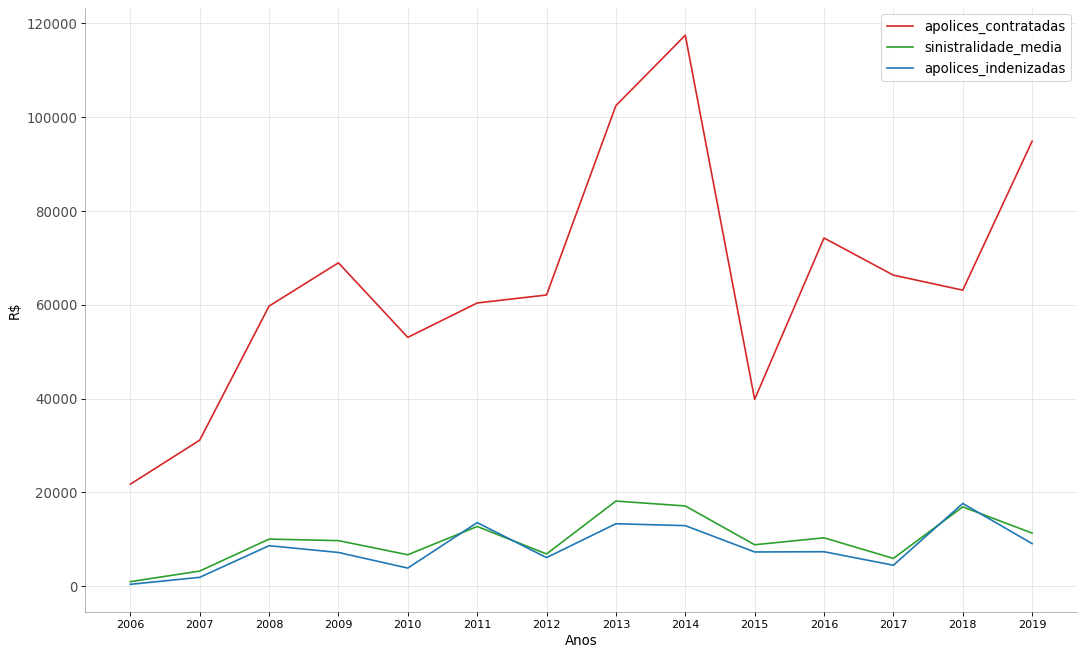

In [345]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('ano', 'apolices_contratadas', data=df_soma_anos, color='tab:red')
plt.plot('ano', 'sinistralidade_media', data=df_soma_anos, color='tab:green')
plt.plot('ano', 'apolices_indenizadas', data=df_soma_anos, color='tab:blue')

plt.yticks(fontsize=12, alpha=.7)
plt.grid(axis='both', alpha=.3)
plt.xlabel("Anos", fontsize=12)
plt.ylabel("R\$", fontsize=12)
plt.legend(fontsize=12)    

plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()